In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_csv('data/affitti-milano-latlng.csv', index_col=0)
data = data.dropna()

gve = [45.466263, 9.188801]
data['distance_centre'] = data.apply(lambda row: (row.lat - gve[0])**2 + (row.lng - gve[1])**2, axis=1)
data['price_mq'] = data.apply(lambda row: row.price / row.space, axis=1)

data.head()

,href,address,price,space,lng,lat,distance_centre,price_mq
0,https://www.immobiliare.it/68775213-Affitto-Mo...,"via Giovanni Pierluigi da Palestrina 18, Centr...",500.0,25.0,9.212048,45.486306,0.000942,20.000000
1,https://www.immobiliare.it/68772565-Affitto-Bi...,"piazza Cinque Giornate, 4, Guastalla, Milano",1080.0,70.0,9.206564,45.461894,0.000335,15.428571
2,https://www.immobiliare.it/68774701-Affitto-Bi...,"via Tertulliano, 58, Lodi - Brenta, Milano",650.0,50.0,9.217674,45.442157,0.001415,13.000000
3,https://www.immobiliare.it/68772291-Affitto-Bi...,"piazza V Giornate, Guastalla, Milano",1542.0,65.0,9.206740,45.462255,0.000338,23.723077
4,https://www.immobiliare.it/68772287-Affitto-Tr...,"piazza V Giornate, Guastalla, Milano",2760.0,140.0,9.206740,45.462255,0.000338,19.714286


In [3]:
data = data.drop(data[0.005 < data.distance_centre].index)
data = data.drop(data[60 < data.price_mq].index)
data = data.drop(data[9.5 < data.lng].index)
data = data.drop(data[9.0 > data.lng].index)
data = data.drop(data[45.75 < data.lat].index)
data = data.drop(data[data.lat < 45.25].index)
data = data.drop(data[data.price > 7000].index)
data = data.drop(data[data.space > 500].index)

In [4]:
gve = [45.466263, 9.188801]
data['distance_centre'] = data.apply(lambda row: (row.lat - gve[0])**2 + (row.lng - gve[1])**2, axis=1)

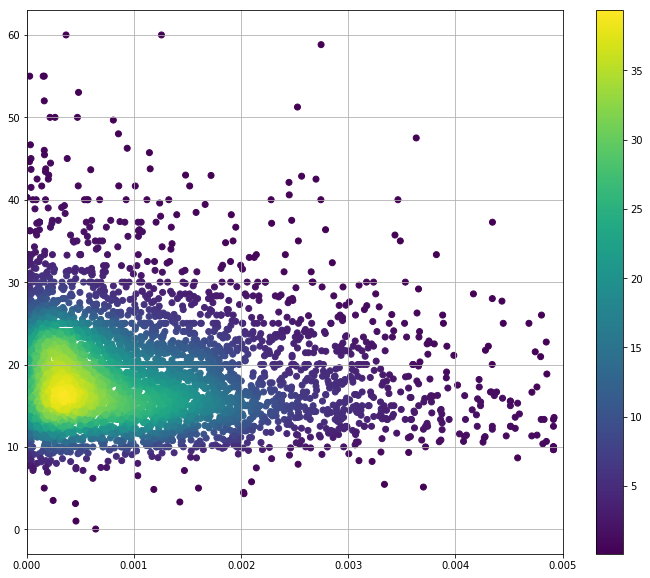

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

xy = np.vstack([data['distance_centre'], data['price_mq']])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(12, 10))
plt.grid()
plt.xlim((0., 0.005))
plt.scatter(data['distance_centre'], data['price_mq'], c=z)
plt.colorbar()

In [6]:
(gve[0] - 45.482991)**2 + (gve[1] - 9.186314) ** 2

0.00028601115300001914

In [7]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key='MY KEY')

In [8]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(data[['lat', 'lng']], weights=data['price_mq']))
fig

Figure(layout=FigureLayout(height='420px'))